In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [86]:
df=pd.read_csv('liver.csv')

In [87]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [88]:
df.shape

(583, 11)

In [89]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [91]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [92]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [93]:
df=df.dropna()
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [94]:
df.shape

(579, 11)

In [95]:
print("No of duplicate values:" , duplicates.shape[0],"\nSize of data:", df.shape)

No of duplicate values: 26 
Size of data: (579, 11)


In [96]:
df = df[-df.duplicated(subset=None,keep='first')]
duplicates = df[df.duplicated(keep=False)]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [97]:
print("No of duplicate values: 0\nSize of data:",df.shape)

No of duplicate values: 0
Size of data: (566, 11)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


In [99]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Dataset'] = le.fit_transform(df['Dataset'])  # Corrected the typo here
unique_values = df['Dataset'].unique()  # Corrected the typo in the variable name

X = df.drop('Dataset', axis=1)
Y = df['Dataset']  # Corrected the typo in the variable name


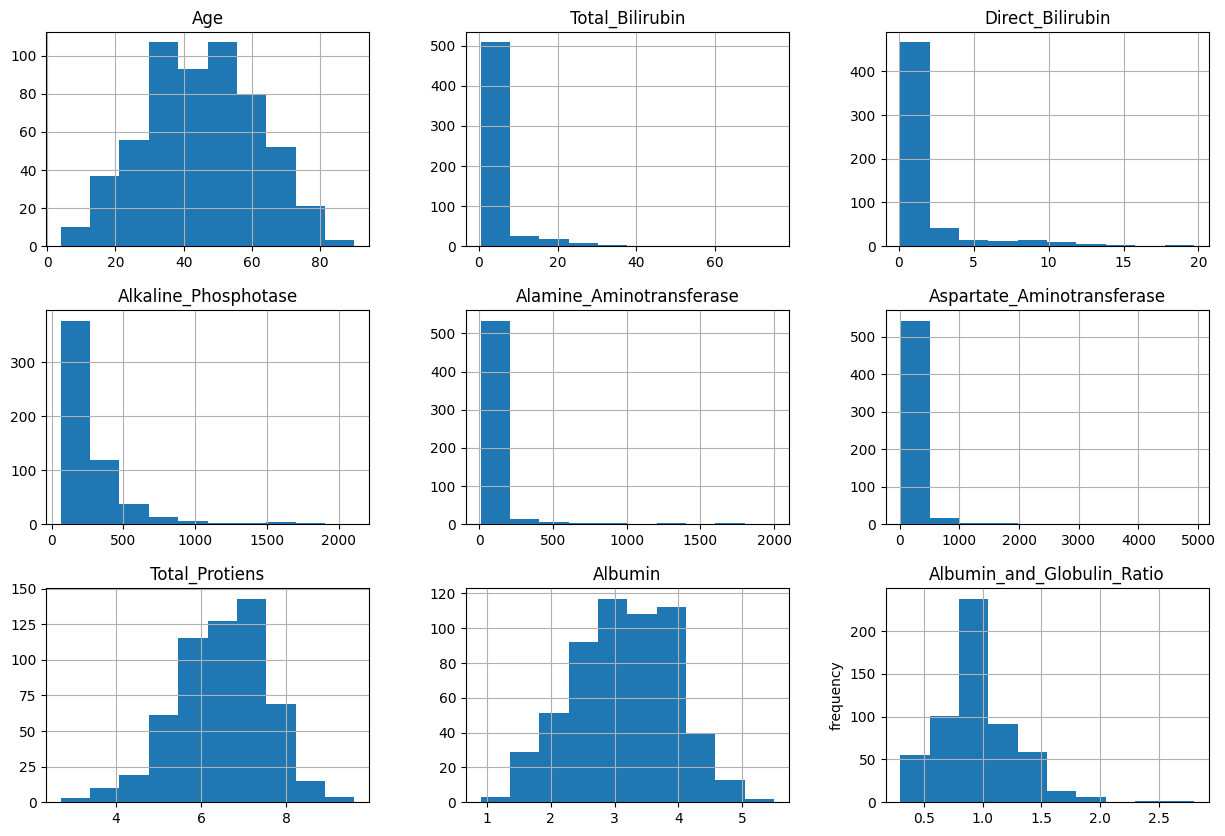

In [101]:
X.hist(figsize=(15,10))
plt.ylabel('frequency')
plt.show()

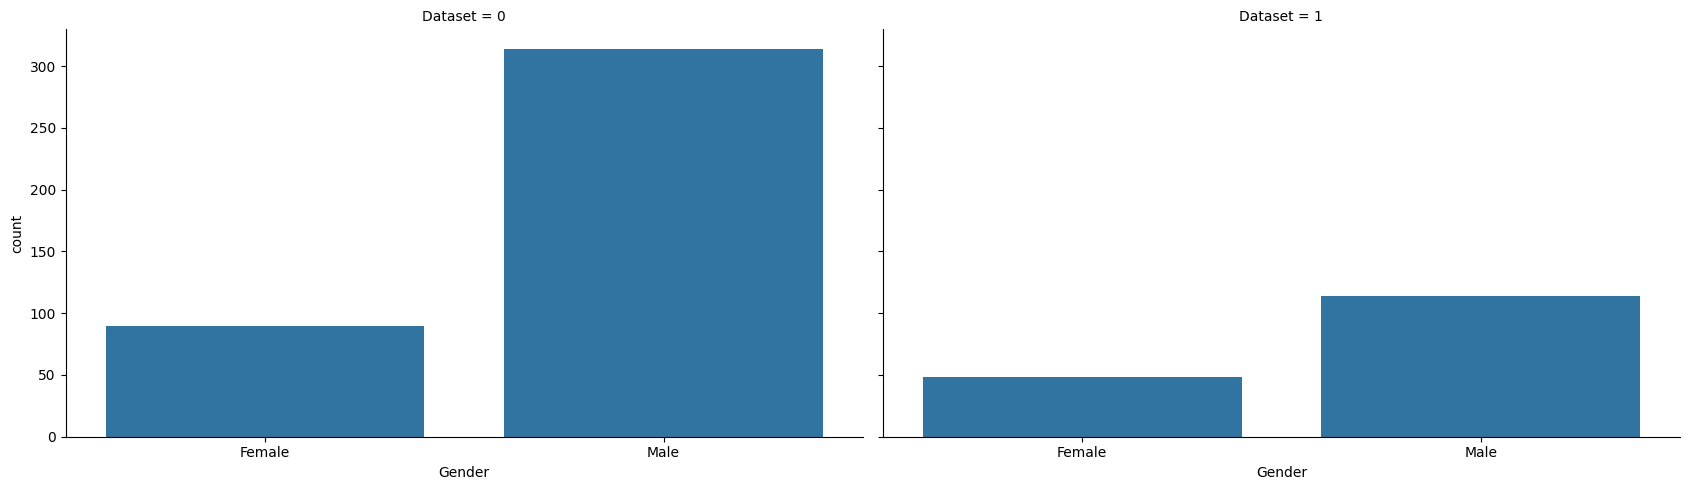

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Gender", col="Dataset", data=df, kind="count", height=5, aspect=1.7)
plt.show()


In [103]:
df['Gender']=le.fit_transform(df['Gender'])

In [104]:
df = df.drop(['Age', 'Gender','Aspartate_Aminotransferase'], axis=1)
df.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,0.1,187,16,6.8,3.3,0.90,0
1,10.9,5.5,699,64,7.5,3.2,0.74,0
2,7.3,4.1,490,60,7.0,3.3,0.89,0
3,1.0,0.4,182,14,6.8,3.4,1.00,0
4,3.9,2.0,195,27,7.3,2.4,0.40,0


In [105]:


X= df.drop('Dataset',axis=1)
y=df['Dataset']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

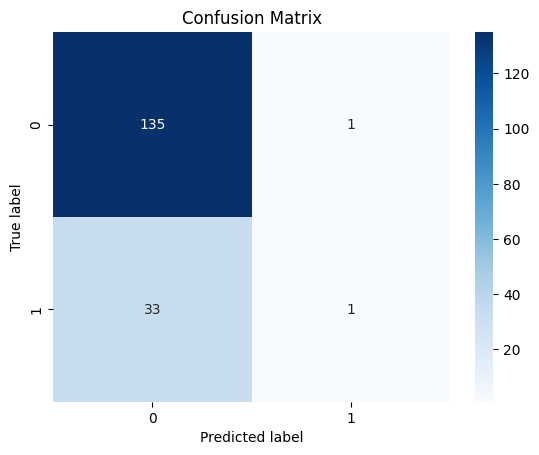

ACCURACY: 0.8


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and Y are your feature matrix and target variable, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3444)

reg = LogisticRegression(solver="newton-cg")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Corrected sns.heatmap and added plt.show() at the end
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("ACCURACY:", accuracy)


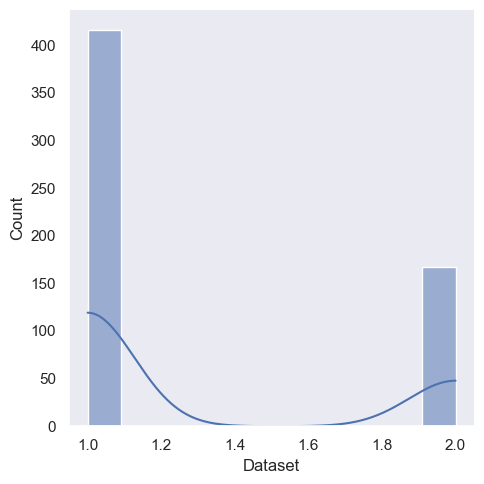

In [97]:
sns.displot(df['Dataset'],kde=True)

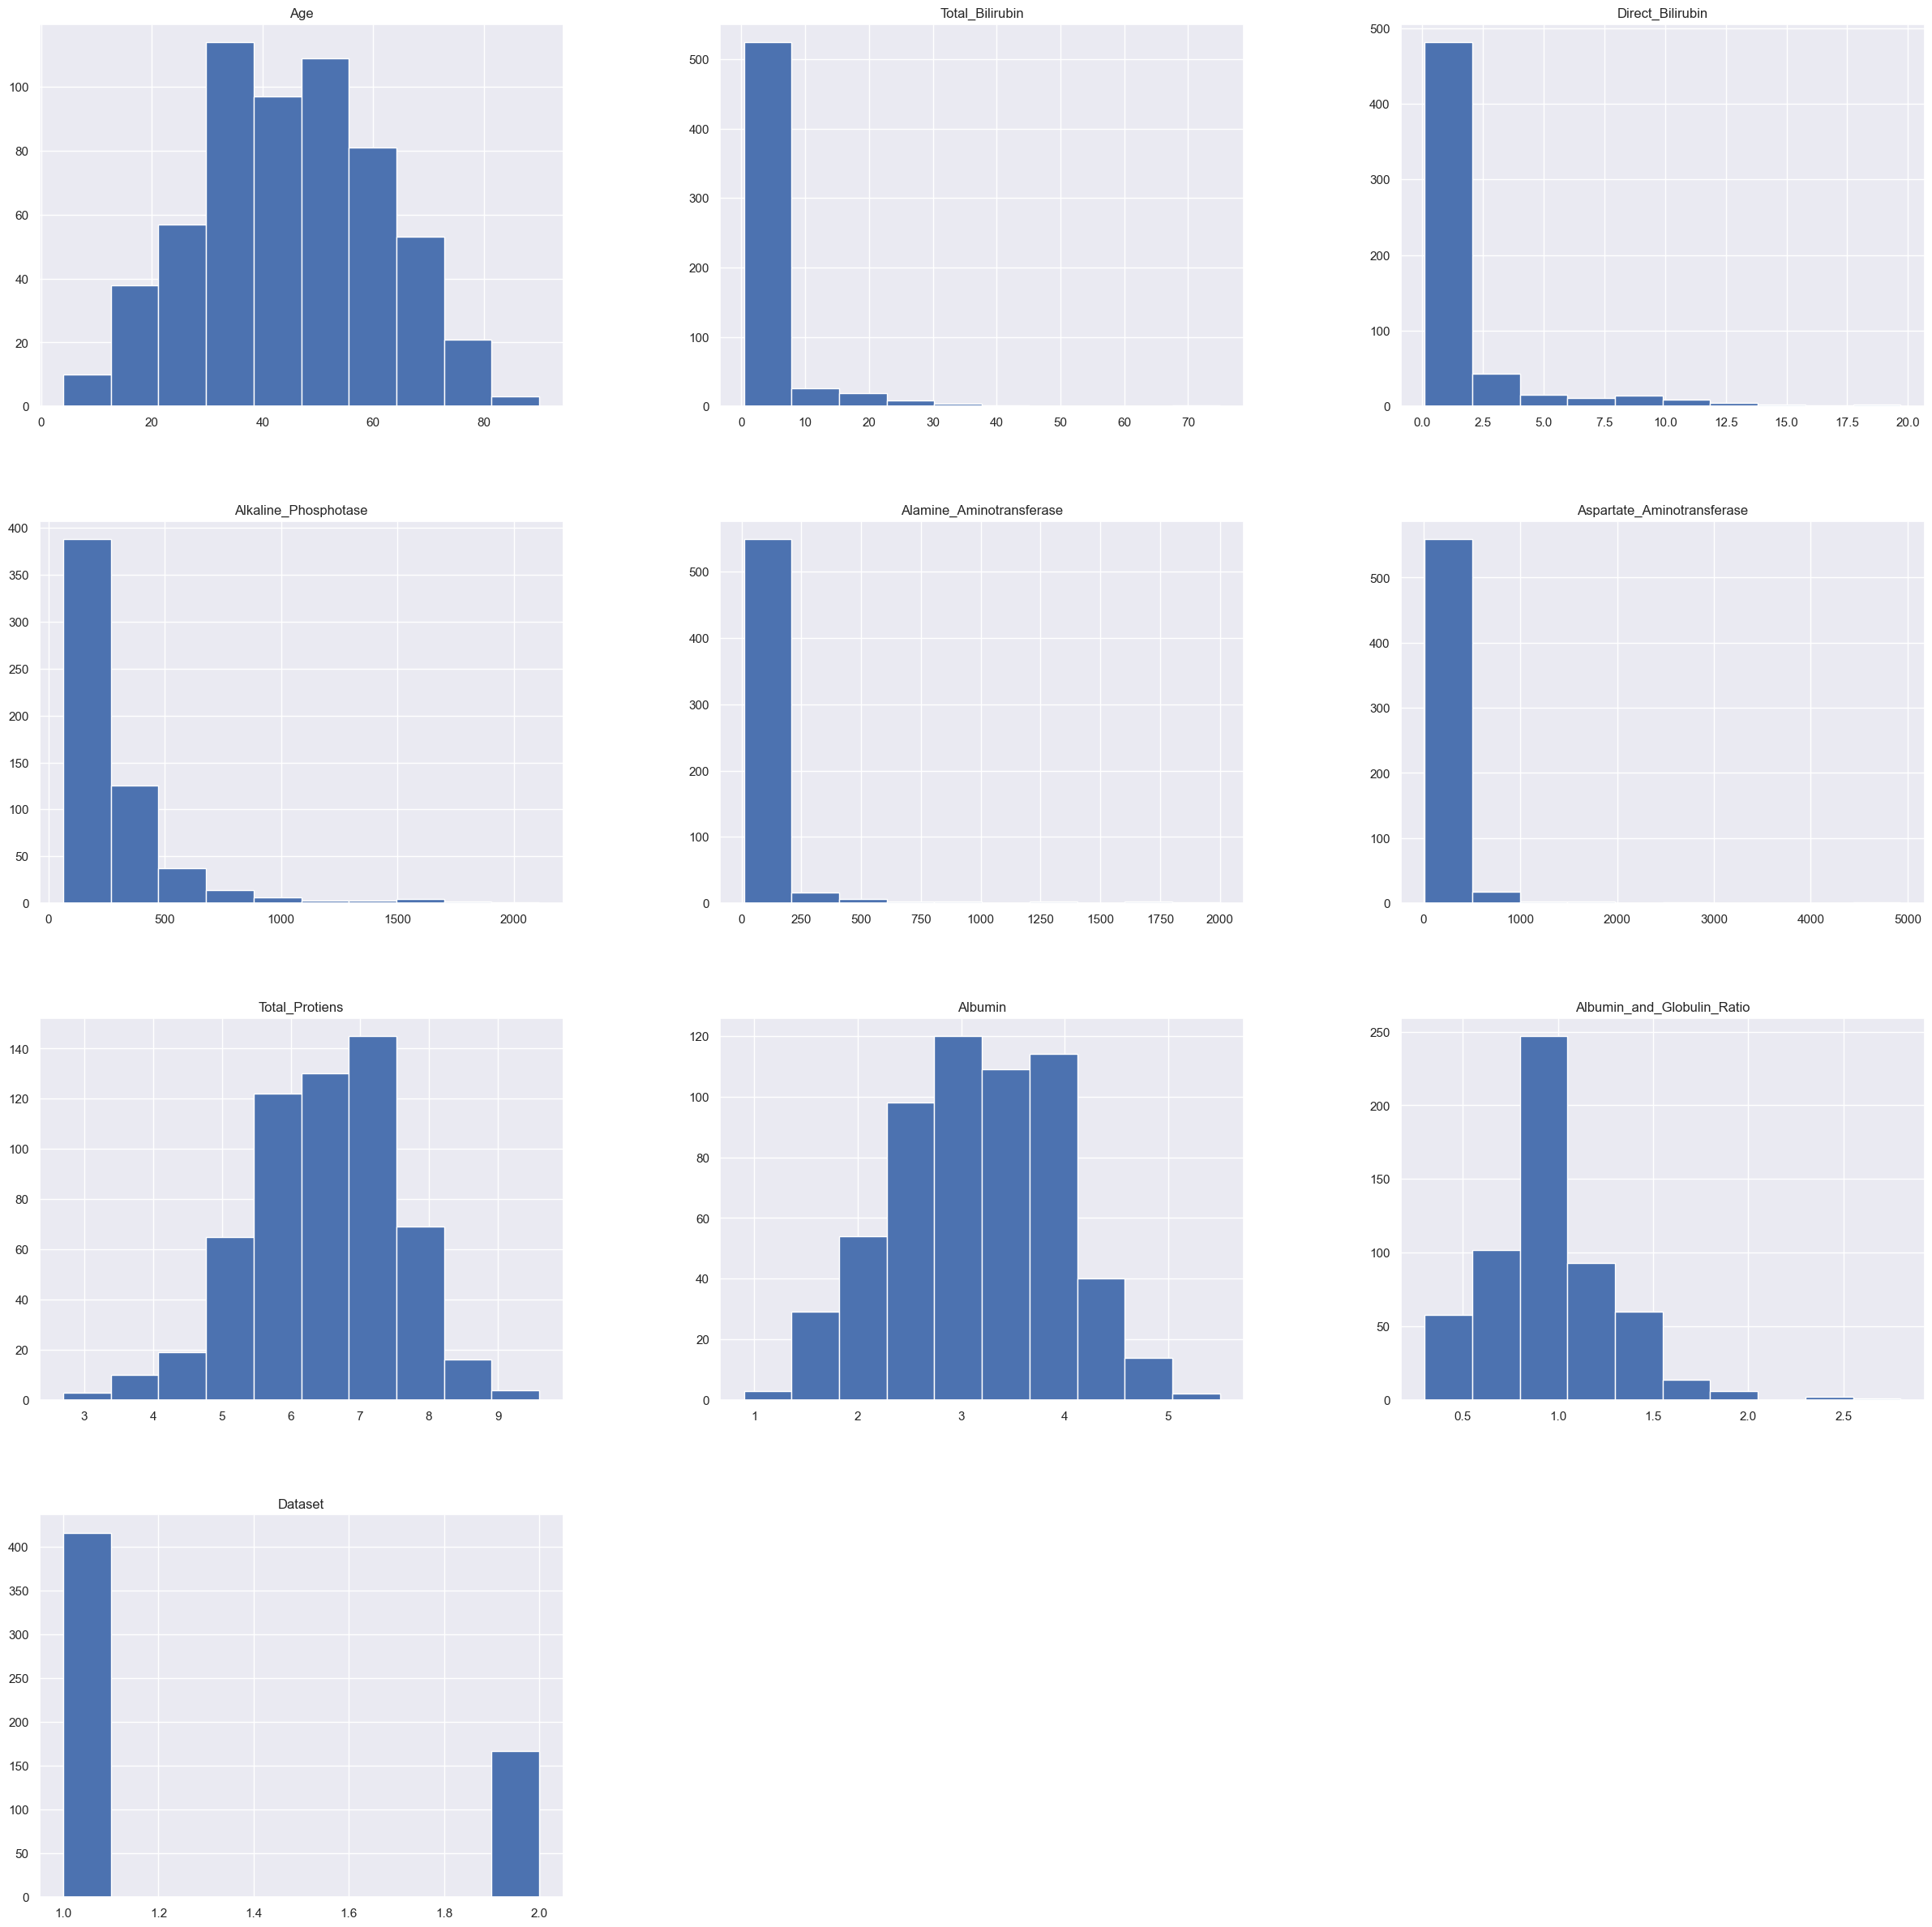

In [98]:
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

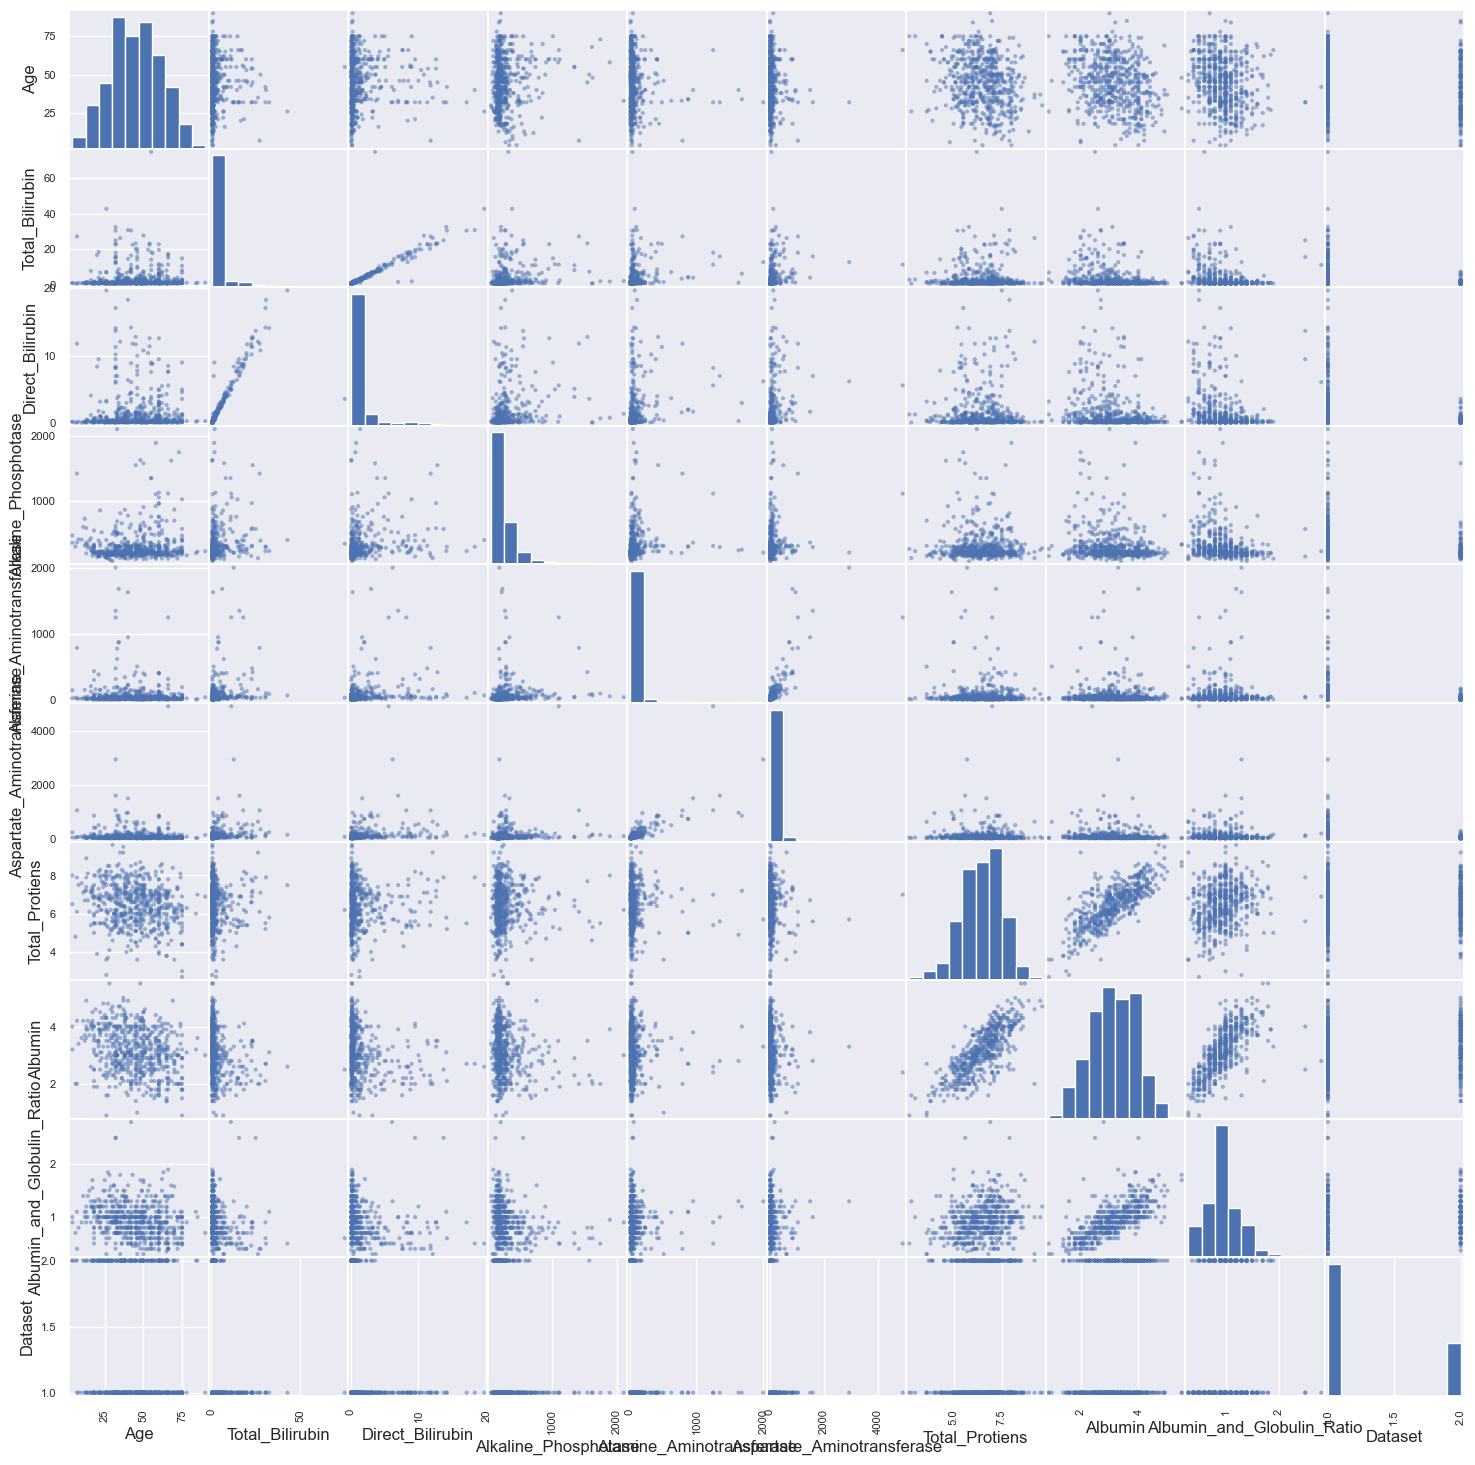

In [99]:
scatter_matrix(df, figsize = (18,18))
plt.show()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [101]:
#target = df['Dataset']
#df = df.drop('Dataset', axis=1)

In [102]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df)


In [103]:
#df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Add the target variable back
#df_scaled['Dataset'] = target

In [104]:
df_scaled.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


In [105]:
"""#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['Dataset'].values
X = df.drop('Dataset', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)"""

In [106]:
"""# Testing Options
scoring = 'accuracy'"""

In [108]:
"""# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=2, random_state=0)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)"""

For CART Model:Mean accuracy is 0.661646 (Std accuracy is 0.086390)
For SVM Model:Mean accuracy is 0.683659 (Std accuracy is 0.042761)
For NB Model:Mean accuracy is 0.593110 (Std accuracy is 0.039880)
For KNN Model:Mean accuracy is 0.662012 (Std accuracy is 0.069464)
For RFC Model:Mean accuracy is 0.676220 (Std accuracy is 0.052609)


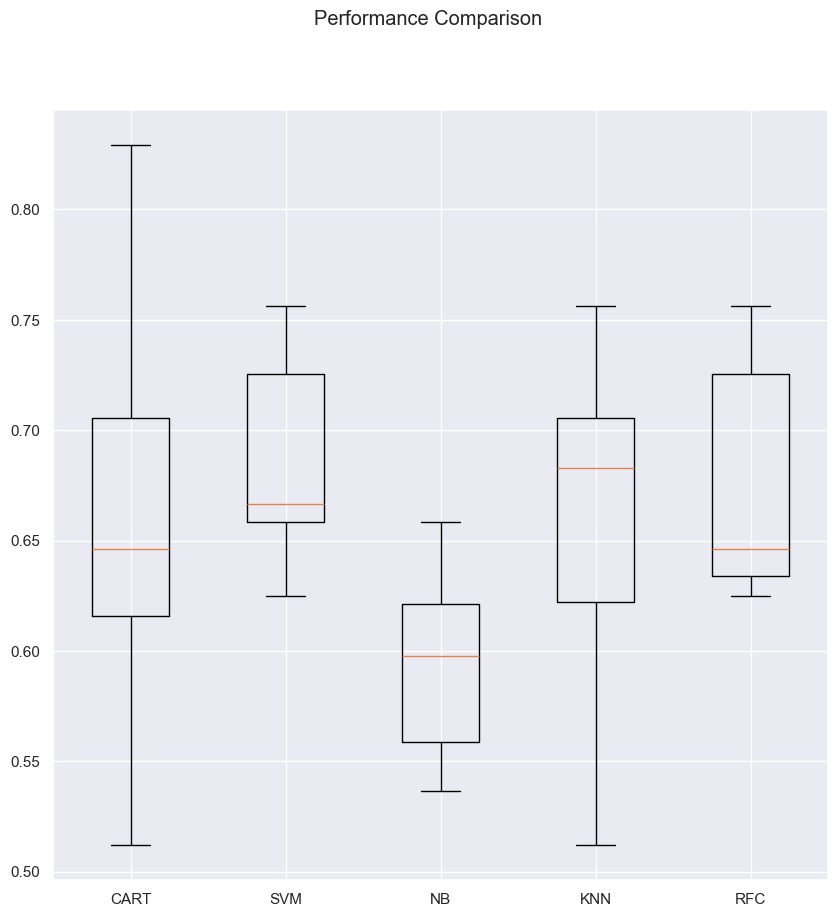

In [109]:
"""fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()"""

In [110]:
"""for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))"""


Model: CART
Accuracy score: 0.5828571428571429
Classification report:
               precision    recall  f1-score   support

           1       0.80      0.63      0.70       137
           2       0.24      0.42      0.30        38

    accuracy                           0.58       175
   macro avg       0.52      0.52      0.50       175
weighted avg       0.68      0.58      0.62       175


Model: SVM
Accuracy score: 0.7828571428571428
Classification report:
               precision    recall  f1-score   support

           1       0.78      1.00      0.88       137
           2       0.00      0.00      0.00        38

    accuracy                           0.78       175
   macro avg       0.39      0.50      0.44       175
weighted avg       0.61      0.78      0.69       175


Model: NB
Accuracy score: 0.5371428571428571
Classification report:
               precision    recall  f1-score   support

           1       0.95      0.43      0.59       137
           2       0.31 

c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [62]:
"""clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict"""

'clf = SVC()\n\nclf.fit(X_train, Y_train)\naccuracy = clf.score(X_test, Y_test)\nprint("Test Accuracy:",accuracy)\n\npredict = clf.predict(X_test)\npredict'

In [112]:
"""example_measures = [[0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240]]
prediction = clf.predict(example_measures)
print(prediction)"""

[1]


In [113]:
"""import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')"""

c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vagis\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           1       0.78      1.00      0.88       137
           2       0.00      0.00      0.00        38

    accuracy                           0.78       175
   macro avg       0.39      0.50      0.44       175
weighted avg       0.61      0.78      0.69       175

Confusion matrix, without normalization
[[0 0]
 [0 0]]


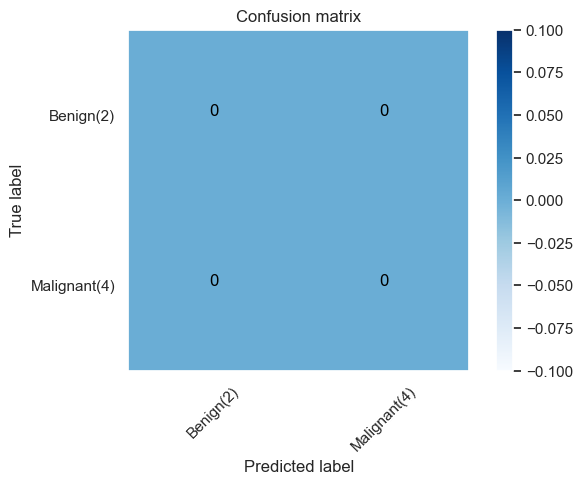

In [114]:
"""cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')"""

In [65]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       136
           1       0.17      0.03      0.05        34

    accuracy                           0.78       170
   macro avg       0.48      0.50      0.46       170
weighted avg       0.67      0.78      0.71       170



In [66]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [107]:
import pickle
pickle.dump(reg, open('modelLIVER.pkl','wb'))
model = pickle.load(open('modelLIVER.pkl','rb'))
print(model.predict([[0.7,0.1,187,16,6.8,3.3,0.90]]))

[0]
